In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from cycler import cycler

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

default_cycler = cycler(marker=['o', '*', 'X', 'P', '>', 'D'])
plt.rc('axes', prop_cycle=default_cycler)


In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:

df1 = pd.read_csv(f'./packet_length_5_255.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df2 = pd.read_csv(f'./packet_length_5_100.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df3 = pd.read_csv(f'./packet_length_101_200.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df4 = pd.read_csv(f'./packet_length_201_255.ratio.csv', sep=',', converters={'c_packet_rate': p2f})

df5 = pd.read_csv(f'./battery_life_500.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df6 = pd.read_csv(f'./battery_life_600.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df7 = pd.read_csv(f'./battery_life_700.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df8 = pd.read_csv(f'./battery_life_800.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df9 = pd.read_csv(f'./battery_life_900.ratio.csv', sep=',', converters={'c_packet_rate': p2f})


In [4]:
df1['mode'] = '封包隨機大小 5~255'
df2['mode'] = '封包隨機大小 5~100'
df3['mode'] = '封包隨機大小 101~200'
df4['mode'] = '封包隨機大小 201~255'
df5['mode'] = 'lifetime 500'
df6['mode'] = 'lifetime 600'
df7['mode'] = 'lifetime 700'
df8['mode'] = 'lifetime 800'
df9['mode'] = 'lifetime 900'



In [5]:
df = pd.concat([df1, df2, df3, df4], axis=0, sort=False)
df2 = pd.concat([df5, df6, df7, df8, df9], axis=0, sort=False)

In [6]:
def sort_cal(df):
    df = df.sort_values(['mode', 'period', 'nodes'])
    df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
    df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']
    df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']
    df['c_sensor_success_padding_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['c_sensor_want_send_packets']
    df['avg_agg_packets'] = df['agg_packets'] / df['period']
    df['avg_append_packets'] = df['append_packets'] / df['period']
    df['agg_packets_percent'] = df['agg_packets'] / df['c_sensor_want_send_packets']
    df['append_packets_percent'] = df['append_packets'] / df['c_sensor_want_send_packets']
    return df

In [7]:
df = sort_cal(df)
df2 = sort_cal(df2)

In [8]:
df

mode     sim  nodes  period  c_packet_rate  \
98  封包隨機大小 101~200   sim-1    100      50        0.98990   
96  封包隨機大小 101~200   sim-1    200      50        0.98268   
97  封包隨機大小 101~200   sim-1    300      50        0.97154   
99  封包隨機大小 101~200   sim-1    400      50        0.94329   
95  封包隨機大小 101~200   sim-1    500      50        0.95238   
..             ...     ...    ...     ...            ...   
18    封包隨機大小 5~255   sim-1    100    1000        0.99457   
16    封包隨機大小 5~255   sim-1    200    1000        0.96117   
17    封包隨機大小 5~255   sim-1    300    1000        0.96841   
19    封包隨機大小 5~255   sim-1    400    1000        0.96758   
15    封包隨機大小 5~255   sim-1    500    1000        0.95460   

    c_sensor_want_send_packets  c_sensor_buffer_packets  \
98                        7246                     2491   
96                       14385                     4992   
97                       21721                     7490   
99                       28635                     9987   
95                       35832                    12491   
..                         ...                      ...   
18                         373                        5   
16                         738                       17   
17                        1056                       43   
19                        1450                       62   
15                        1842                      123   

    c_sensor_send_success  c_sensor_drop_packets  agg_packets  append_packets  \
98                    396                   4359            0               0   
96                    462                   8931            0               0   
97                    493                  13738            0               0   
99                    530                  18118            0               0   
95                    546                  22795            0               0   
..                    ...                    ...          ...             ...   
18                    368                      0            0               0   
16                    721                      0            0               0   
17                   1013                      0            0               0   
19                   1388                      0            0               0   
15                   1719                      0            0               0   

    out_of_date_packets  c_sensor_buffer_packet_rate  \
98                    0                    24.910000   
96                    0                    24.960000   
97                    0                    24.966667   
99                    0                    24.967500   
95                    0                    24.982000   
..                  ...                          ...   
18                    0                     0.050000   
16                    0                     0.085000   
17                    0                     0.143333   
19                    0                     0.155000   
15                    0                     0.246000   

    c_sensor_drop_packet_rate  c_sensor_success_packet_rate  \
98                  43.590000                      3.920004   
96                  44.655000                      2.269991   
97                  45.793333                      1.596564   
99                  45.295000                      1.249859   
95                  45.590000                      1.039999   
..                        ...                           ...   
18                   0.000000                      3.660018   
16                   0.000000                      3.465018   
17                   0.000000                      3.269998   
19                   0.000000                      3.357503   
15                   0.000000                      3.281915   

    c_sensor_success_padding_packet_rate  avg_agg_packets  avg_append_packets  \
98                              0.054099              0.0                 0.0   
96                 

In [9]:
select = df.groupby(['mode', 'nodes', 'period'], as_index=False).mean()

In [10]:
select

mode  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
0    封包隨機大小 101~200    100      50        0.98990                        7246   
1    封包隨機大小 101~200    100     100        0.97647                        3728   
2    封包隨機大小 101~200    100     150        0.96135                        2434   
3    封包隨機大小 101~200    100     200        0.98537                        1851   
4    封包隨機大小 101~200    100     250        0.98544                        1463   
..              ...    ...     ...            ...                         ...   
395    封包隨機大小 5~255    500     800        0.93675                        2189   
396    封包隨機大小 5~255    500     850        0.94239                        2133   
397    封包隨機大小 5~255    500     900        0.92679                        2033   
398    封包隨機大小 5~255    500     950        0.93467                        1891   
399    封包隨機大小 5~255    500    1000        0.95460                        1842   

     c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
0                       2491                    396                   4359   
1                       2417                    426                    885   
2                       1926                    414                     94   
3                       1425                    411                     15   
4                       1050                    413                      0   
..                       ...                    ...                    ...   
395                      260                   1929                      0   
396                      241                   1892                      0   
397                      189                   1844                      0   
398                      146                   1745                      0   
399                      123                   1719                      0   

     agg_packets  append_packets  out_of_date_packets  \
0              0               0                    0   
1              0               0                    0   
2              0               0                    0   
3              0               0                    0   
4              0               0                    0   
..           ...             ...                  ...   
395            0               0                    0   
396            0               0                    0   
397            0               0                    0   
398            0               0                    0   
399            0               0                    0   

     c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
0                         24.910                      43.59   
1                         24.170                       8.85   
2                         19.260                       0.94   
3                         14.250                       0.15   
4                         10.500                       0.00   
..                           ...                        ...   
395                        0.520                       0.00   
396                        0.482                       0.00   
397                        0.378                       0.00   
398                        0.292                       0.00   
399                        0.246                       0.00   

     c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
0                        3.920004                              0.054099   
1                        4.159762                              0.111582   
2                        3.979989                              0.163516   
3                        4.049871                              0.218794   
4                        4.069867                              0.278186   
..                            ...                                   ...   
395                      3.613981                              0.825487   
396                      3.566004                              

In [11]:

sector = select.groupby('nodes')

In [12]:
sector.size()

nodes
100    80
200    80
300    80
400    80
500    80
dtype: int64

## 封包到達率

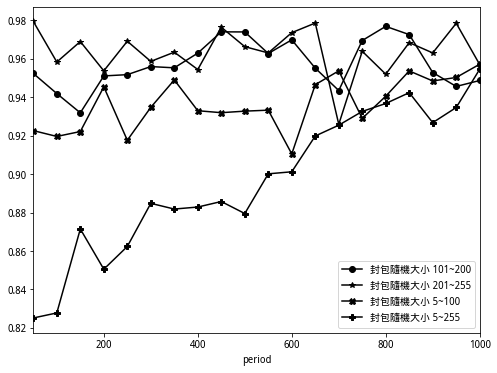

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector.get_group(500).groupby(['mode']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

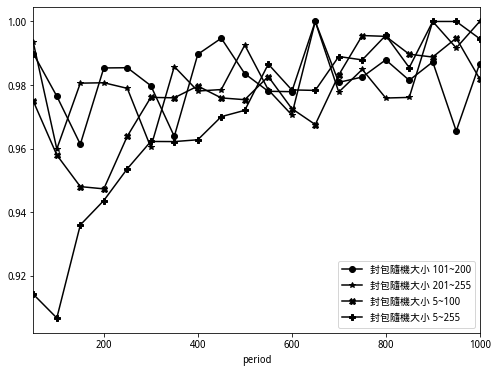

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector.get_group(100).groupby(['mode']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

## 封包到達量

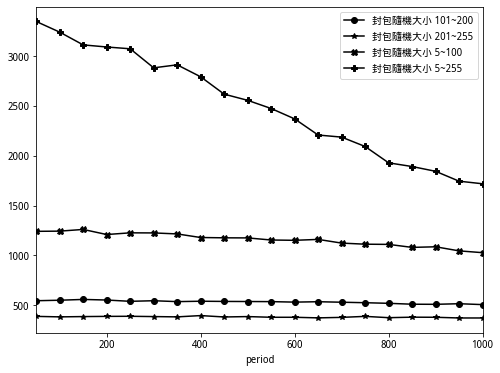

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector.get_group(500).groupby(['mode']):
    d.plot(x='period',y='c_sensor_send_success', ax=ax, label=label)
plt.legend()

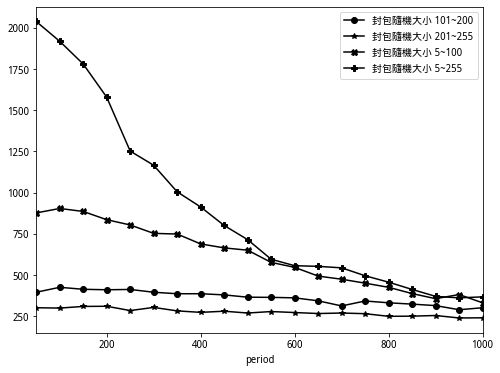

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector.get_group(100).groupby(['mode']):
    d.plot(x='period',y='c_sensor_send_success', ax=ax, label=label)
plt.legend()

# Battery life


In [17]:
select2 = df2.groupby(['mode', 'nodes', 'period'], as_index=False).mean()

In [18]:
select2

mode  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
0    lifetime 500    100      50        0.93382                        1890   
1    lifetime 500    100     100        0.94516                         981   
2    lifetime 500    100     150        0.97117                         740   
3    lifetime 500    100     200        0.97531                         742   
4    lifetime 500    100     250        0.95113                         699   
..            ...    ...     ...            ...                         ...   
495  lifetime 900    500     800        0.92265                        2265   
496  lifetime 900    500     850        0.94814                        2129   
497  lifetime 900    500     900        0.94273                        2058   
498  lifetime 900    500     950        0.94356                        1858   
499  lifetime 900    500    1000        0.92713                        1833   

     c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
0                       1207                    544                    139   
1                        434                    547                      0   
2                        185                    555                      0   
3                        175                    567                      0   
4                        126                    573                      0   
..                       ...                    ...                    ...   
495                      274                   1991                      0   
496                      220                   1909                      0   
497                      207                   1851                      0   
498                      156                   1702                      0   
499                      145                   1688                      0   

     agg_packets  append_packets  out_of_date_packets  \
0              0               0                    0   
1              0               0                    0   
2              0               0                    0   
3              0               0                    0   
4              0               0                    0   
..           ...             ...                  ...   
495            0               0                    0   
496            0               0                    0   
497            0               0                    0   
498            0               0                    0   
499            0               0                    0   

     c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
0                         12.070                       1.39   
1                          4.340                       0.00   
2                          1.850                       0.00   
3                          1.750                       0.00   
4                          1.260                       0.00   
..                           ...                        ...   
495                        0.548                       0.00   
496                        0.440                       0.00   
497                        0.414                       0.00   
498                        0.312                       0.00   
499                        0.290                       0.00   

     c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
0                        5.079981                              0.268782   
1                        5.170025                              0.527016   
2                        5.389994                              0.728378   
3                        5.530008                              0.745284   
4                        5.449975                              0.779682   
..                            ...                                   ...   
495                      3.673992                              0.811036   
496                      3.619999                              0.850164   
497       

In [19]:
sector2 = select2.groupby('nodes')

In [20]:
sector2.size()

nodes
100    100
200    100
300    100
400    100
500    100
dtype: int64

## 封包到達率

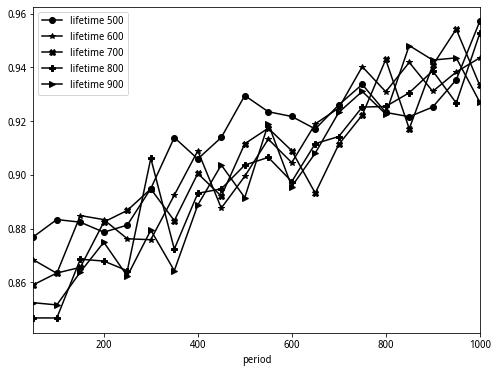

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector2.get_group(500).groupby(['mode']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

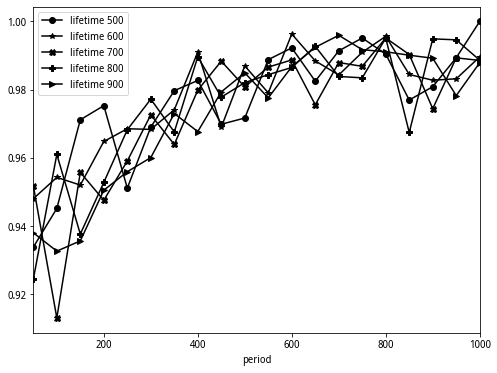

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector2.get_group(100).groupby(['mode']):
    d.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

## 封包到達量

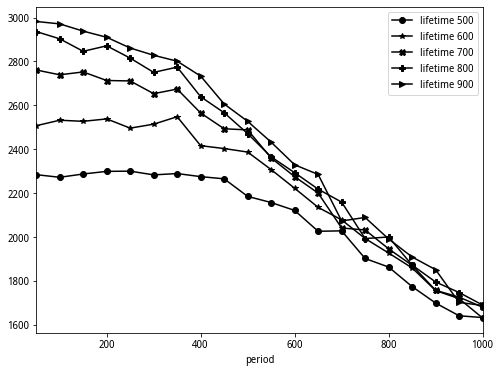

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector2.get_group(500).groupby(['mode']):
    d.plot(x='period',y='c_sensor_send_success', ax=ax, label=label)
plt.legend()

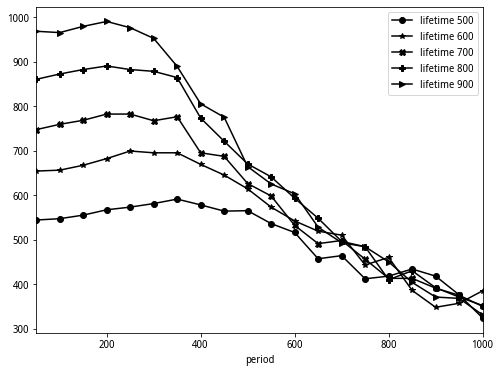

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

for label, d in sector2.get_group(100).groupby(['mode']):
    d.plot(x='period',y='c_sensor_send_success', ax=ax, label=label)
plt.legend()